In [1]:
import numpy as np
import pandas as pd
import sys
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

['c:\\Users\\tymot\\OneDrive\\Studia\\Semestr 5\\Analiza danych\\Projekt', 'c:\\Users\\tymot\\anaconda3\\python39.zip', 'c:\\Users\\tymot\\anaconda3\\DLLs', 'c:\\Users\\tymot\\anaconda3\\lib', 'c:\\Users\\tymot\\anaconda3', '', 'c:\\Users\\tymot\\anaconda3\\lib\\site-packages', 'c:\\Users\\tymot\\anaconda3\\lib\\site-packages\\win32', 'c:\\Users\\tymot\\anaconda3\\lib\\site-packages\\win32\\lib', 'c:\\Users\\tymot\\anaconda3\\lib\\site-packages\\Pythonwin']


In [2]:
df = pd.read_excel('aaa.xlsx')
#df = pd.read_csv('data.csv')
#df = df.drop(columns=['genre','artist_name','track_name','track_id','popularity','time_signature'],axis=1)
df = df.drop(columns=['time_signature'],axis=1)

encoder = LabelEncoder()

df['key'] = encoder.fit_transform(df['key'])
df['mode']=encoder.fit_transform(df['mode'])
df.shape
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,1


In [9]:
std = StandardScaler()
scalled = std.fit_transform(df.drop(['liked'],axis=1))

In [10]:
i = 0 
#podmień wszystkie wartości na wartości znormalizowane
for column in df.columns[:-1]:
    df[column] = scalled[:,i]
    i += 1

In [11]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,liked
0,0.769903,-0.055628,0.441095,0.417562,-1.080123,-0.843078,0.412263,-0.554830,-0.458413,0.503237,-0.896670,1.266065,0
1,0.580139,0.248888,1.321780,0.235180,-1.080123,1.307549,-0.353462,-0.556955,-0.541666,0.095009,1.079610,0.469229,1
2,-1.738685,-2.403485,-1.320274,-2.772810,0.925820,-0.891369,2.103110,2.040507,-0.439492,-1.705687,-1.634621,1.022384,0
3,0.395003,0.376091,-0.733151,0.382222,-1.080123,-0.753156,0.349755,-0.556952,-0.240821,0.330957,-1.114714,-0.062375,1
4,0.695849,-0.256069,-1.320274,0.302018,0.925820,0.608158,-0.544112,-0.556955,-0.692088,0.574396,1.214835,-0.472381,1


In [52]:
x, y = df.drop('liked',axis=1),df['liked']
x.shape, y.shape

((195, 12), (195,))

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.4, random_state=1)
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape

((117, 12), (78, 12), (117,), (78,))

In [64]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),

])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    
)

In [ ]:
model.fit(x_train, y_train, epochs=200)

In [67]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.7550 - accuracy: 0.9231


[0.754991352558136, 0.9230769276618958]

In [68]:
def predict(data):
    pred = model.predict(data).flatten()
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def plot_cm(y_true,y_pred,title=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt='g',cmap='YlGnBu')
    plt.title(title)
    plt.show()

3/3 [==============================] - 0s 4ms/step


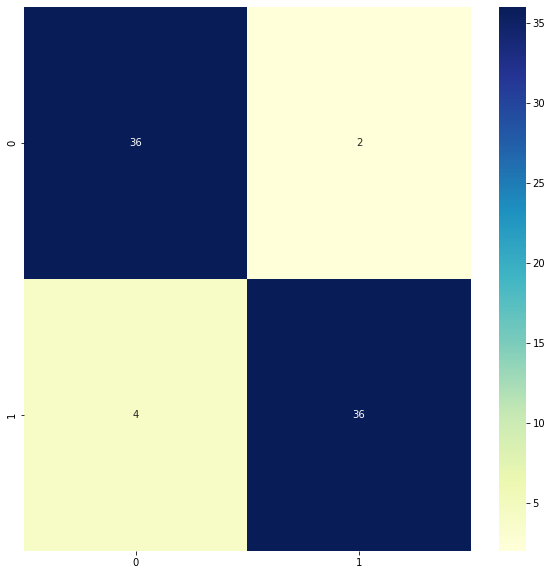

In [70]:
y_pred_test = predict(x_test)
plot_cm(y_test, y_pred_test)

In [112]:
model.save('model/Spotify_model')

INFO:tensorflow:Assets written to: model/Spotify_model\assets


INFO:tensorflow:Assets written to: model/Spotify_model\assets
